# TEKNİK ANALİZ

In [77]:
# Bollinger Band ve Rsi

[*********************100%%**********************]  1 of 1 completed


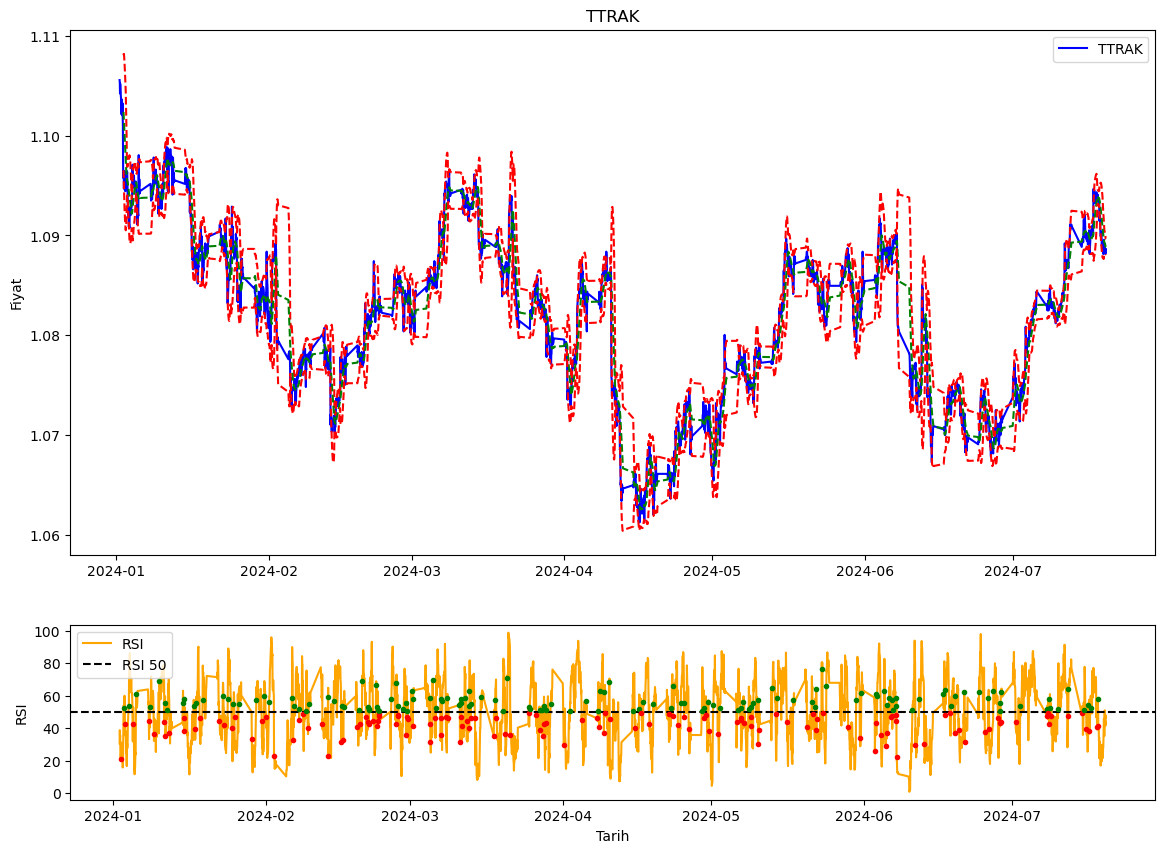

     Color                Date
118    Red 2024-07-16 12:00:00
60   Green 2024-07-08 12:00:00
117    Red 2024-07-08 10:00:00
59   Green 2024-07-02 13:00:00


In [117]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Veri indirme
data = yf.download('EURUSD=X', start='2024-01-01', end='2024-07-20', interval="1h")

# Bollinger Band'ları hesaplama
window = 20
data['SMA'] = data['Close'].rolling(window=window).mean()
data['STD'] = data['Close'].rolling(window=window).std()
data['UpperBand'] = data['SMA'] + 2 * data['STD']
data['LowerBand'] = data['SMA'] - 2 * data['STD']

# RSI hesaplama
window_rsi = 14
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=window_rsi).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_rsi).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Grafik çizimi
plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [3, 1]})

# Hisse senedi fiyatı ve Bollinger Band
ax1.plot(data.index, data['Close'], label='TTRAK', color='blue')
ax1.plot(data.index, data['UpperBand'], linestyle='--', color='red')
ax1.plot(data.index, data['SMA'], linestyle='--', color='green')
ax1.plot(data.index, data['LowerBand'], linestyle='--', color='red')
ax1.set_title('TTRAK')
ax1.set_ylabel('Fiyat')
ax1.legend()

# RSI grafiği ve RSI 50 çizgisi
ax2.plot(data.index, data['RSI'], label='RSI', color='orange')
ax2.axhline(y=50, color='black', linestyle='--', label='RSI 50')
ax2.set_ylabel('RSI')
ax2.legend()

# Tarihleri kaydetmek için listeler
green_dates = []
red_dates = []

# RSI 50 ve Bollinger Band orta bandı geçişleri
previous_dot = None
for i in range(len(data)):
    if data['RSI'].iloc[i] > 50 and data['Close'].iloc[i] > data['SMA'].iloc[i]:
        if previous_dot != 'green':
            ax2.plot(data.index[i], data['RSI'].iloc[i], marker='o', markersize=3, color='green')
            previous_dot = 'green'
            green_dates.append(data.index[i])
    elif data['RSI'].iloc[i] < 50 and data['Close'].iloc[i] < data['SMA'].iloc[i]:
        if previous_dot != 'red':
            ax2.plot(data.index[i], data['RSI'].iloc[i], marker='o', markersize=3, color='red')
            previous_dot = 'red'
            red_dates.append(data.index[i])

plt.xlabel('Tarih')
plt.grid(False)
plt.show()

# Borsa çalışma saatlerine göre filtreleme
market_open_time = pd.Timestamp("10:00").time()
market_close_time = pd.Timestamp("18:00").time()

filtered_green_dates = [date for date in green_dates if market_open_time <= date.time() <= market_close_time]
filtered_red_dates = [date for date in red_dates if market_open_time <= date.time() <= market_close_time]

# Tarihleri yazdırma
all_dates = pd.DataFrame({
    'Green': pd.Series(filtered_green_dates),
    'Red': pd.Series(filtered_red_dates)
})
all_dates = all_dates.melt(var_name='Color', value_name='Date').dropna().sort_values(by='Date', ascending=False)

print(all_dates.head(4))


In [ ]:
🔍⚽️ Hisse Hareket Tahmini 📊🎯



Bugün,python, yahoo finance, ve matplotlib kullanarak oluşturduğum indikatörümü sizlerle paylaşıyorum! 🎉



Bu çalışmada, indikatörümün amacı hisse hareketinin Bollinger orta bandını geçip aynı zamanda RSI 50 değerini de geçtiğinde bize sinyal göndermek.Bu sinyallere göre alım-satım işlemleri yapıyoruz.



Temmuz ayında indikatörüm 4 adet işlem önerdi ve hepsini Türk Traktör hissesi üzerinde denedim sinyaller:



3 temmuz 13:30 - AL. 

5 temmuz 10:30 - SAT 

12 temmuz 13:30 - SAT



ilk işlemimizi ikinci sinyal gelene kadar açık tuttuk ve %2.38 kar elde ettik

ikinci işlemi hala kapatmadım ve şuan %9.36 düştü 



Temmuz ayı analizlerime göre eğer indikatörü EURUSD paritesinde kullansaydık sadece 2 temmuz ve 8 temmuz arasında bir işlemden %122 kar elde etmiş olacaktık



ENTRY: 1.07161

TP: 1.08359 (8 Temmuz 10:00)

SL: 1.06851 

 💸💸💸

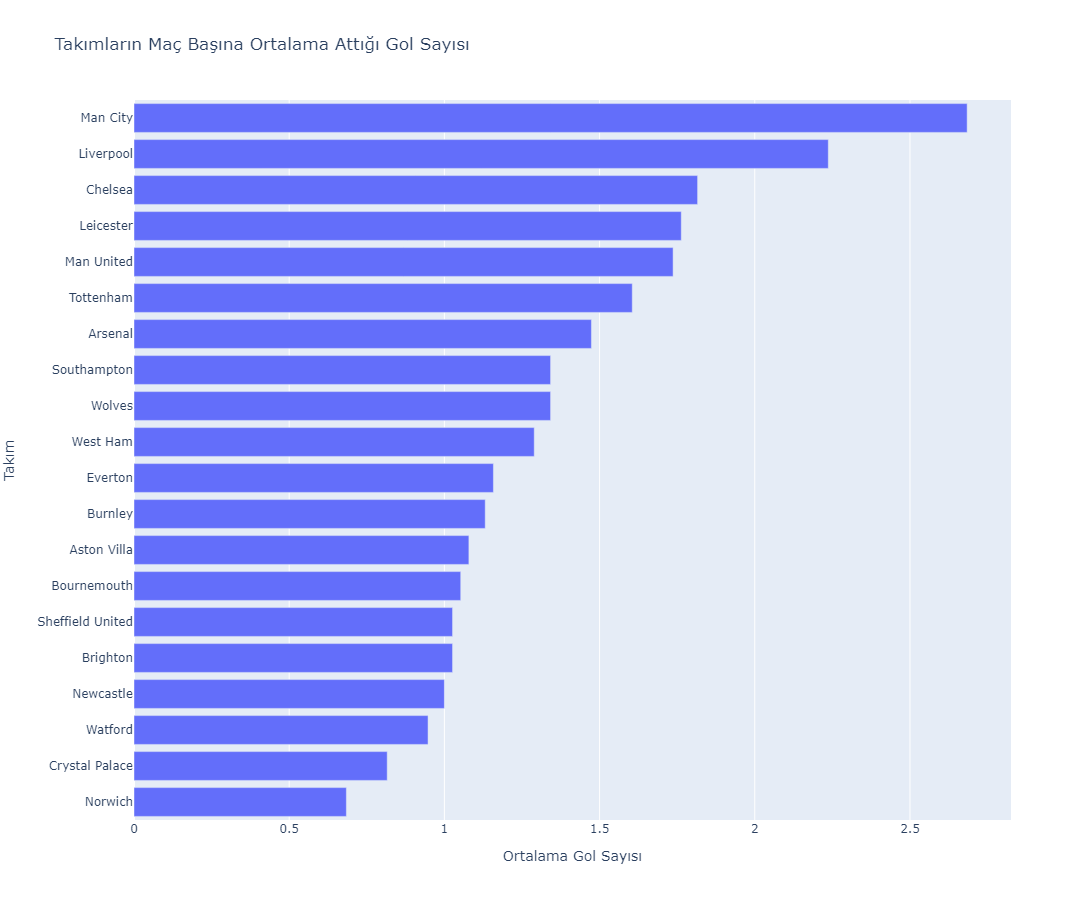

In [198]:
matches_per_team = df['HomeTeam'].value_counts() + df['AwayTeam'].value_counts()
matches_per_team = matches_per_team.reset_index()
matches_per_team.columns = ['Team', 'Matches']

goals_per_team_home = df.groupby('HomeTeam')['FTHG'].sum()
goals_per_team_away = df.groupby('AwayTeam')['FTAG'].sum()
goals_per_team = goals_per_team_home.add(goals_per_team_away, fill_value=0)
goals_per_team = goals_per_team.reset_index()
goals_per_team.columns = ['Team', 'TotalGoals']

team_stats = pd.merge(matches_per_team, goals_per_team, on='Team')

team_stats['AvgGoalsPerMatch'] = team_stats['TotalGoals'] / team_stats['Matches']

team_stats = team_stats.sort_values(by='AvgGoalsPerMatch', ascending=True)

fig = px.bar(
    team_stats,
    x='AvgGoalsPerMatch',
    y='Team',
    orientation='h',
    title='Takımların Maç Başına Ortalama Attığı Gol Sayısı',
    height=900,
    width=800,
    labels={'AvgGoalsPerMatch': 'Ortalama Gol Sayısı', 'Team': 'Takım'},
    hover_data={'AvgGoalsPerMatch': ':.2f'}
)
fig.show()

In [25]:
import pandas as pd
import yfinance as yf
data = yf.download('EURUSD=X', start='2014-02-27', end='2024-07-15')
dat = yf.download('GBPUSD=X', start ='2014-02-27', end='2024-07-15')
print(data.tail())
print("---------------------------------------------------------------")
print(dat.tail())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2024-07-08  1.082603  1.084716  1.081514  1.082603   1.082603       0
2024-07-09  1.083095  1.083424  1.080625  1.083095   1.083095       0
2024-07-10  1.081479  1.082872  1.081186  1.081479   1.081479       0
2024-07-11  1.083330  1.089835  1.083295  1.083330   1.083330       0
2024-07-12  1.087276  1.091119  1.086307  1.087276   1.087276       0
---------------------------------------------------------------
                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2024-07-08  1.280738  1.284687  1.280246  1.280651   1.280651       0
2024-07-09  1.281470  1.282462  1.277923  1.281558   1.281558       0
2024-07-10  1.278871  1.2847

In [17]:
print(data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


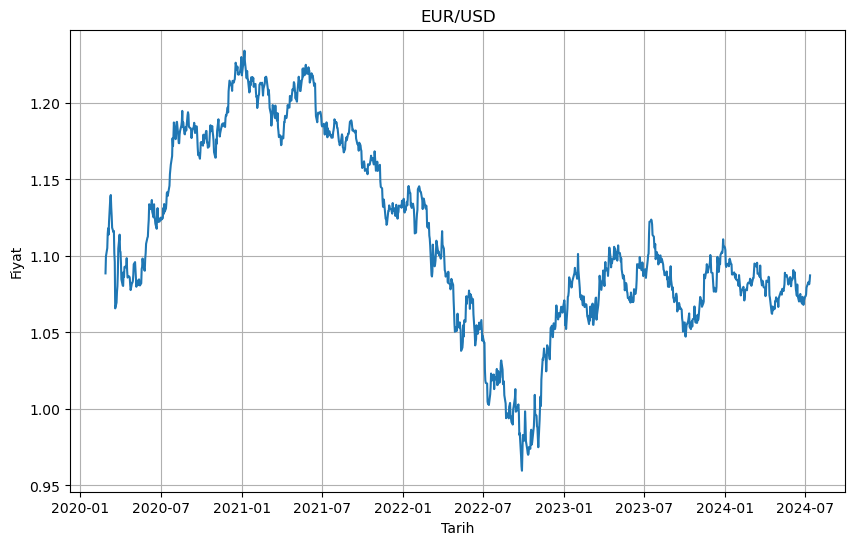

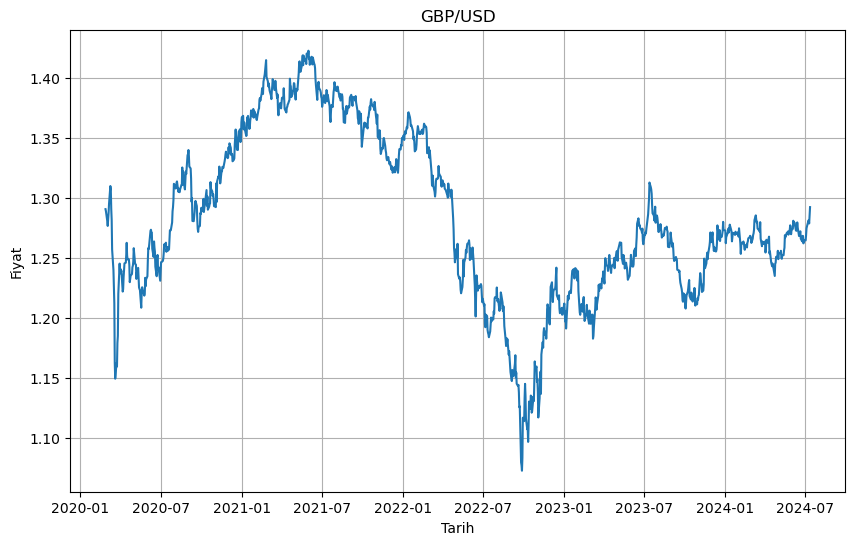

In [27]:
import matplotlib.pyplot as plt
start_date = '2020-02-27'
end_date = '2024-07-15'
selected_data = data[(data.index >= start_date) & (data.index <= end_date)]
plt.figure(figsize=(10, 6))
plt.plot(selected_data.index, selected_data['Close'])
plt.title('EUR/USD')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.grid(True)
plt.show()


start_dat = '2020-02-27'
end_dat = '2024-07-15'
selected_dat = dat[(dat.index >= start_dat) & (dat.index <= end_dat)]
plt.figure(figsize=(10, 6))
plt.plot(selected_dat.index, selected_dat['Close'])
plt.title('GBP/USD')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.grid(True)
plt.show()

[*********************100%%**********************]  1 of 1 completed


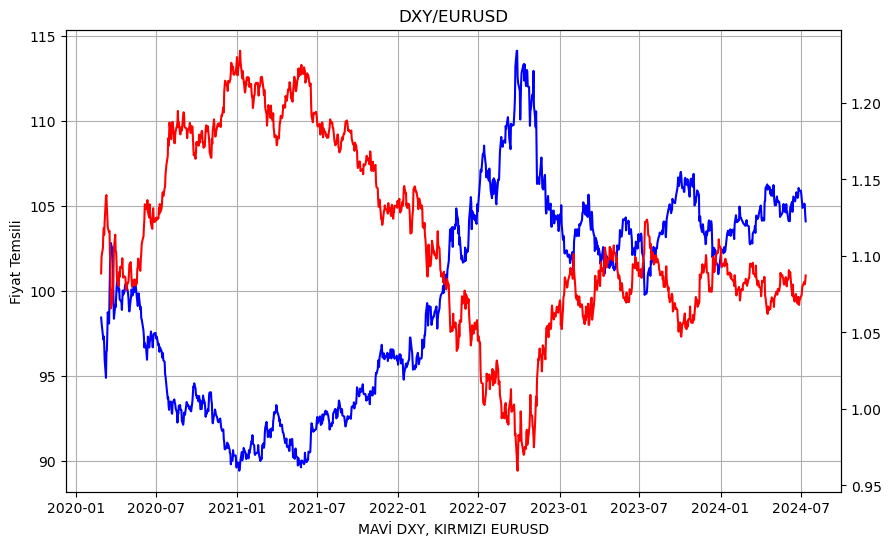

In [31]:
import matplotlib.pyplot as plt
det = yf.download("DX-Y.NYB", start = "2020-02-27", end = "2024-07-15")
det.tail()
start_det = "2020-02-27"
end_det = "2024-07-15"
selected_det = det[(det.index >= start_det) & (det.index <= end_det)]
plt.figure(figsize = (10,6))
plt.plot(selected_det.index, selected_det["Close"], color = "blue")
plt.title("DXY/EURUSD")
plt.xlabel("MAVİ DXY, KIRMIZI EURUSD")
plt.ylabel("Fiyat Temsili")
plt.grid(True)


start_data = '2020-02-27'
end_data = '2024-07-15'
selected_data = data[(data.index >= start_data) & (data.index <= end_data)]
plt.twinx()
plt.plot(selected_data.index, selected_data['Close'], color='red')
plt.show()

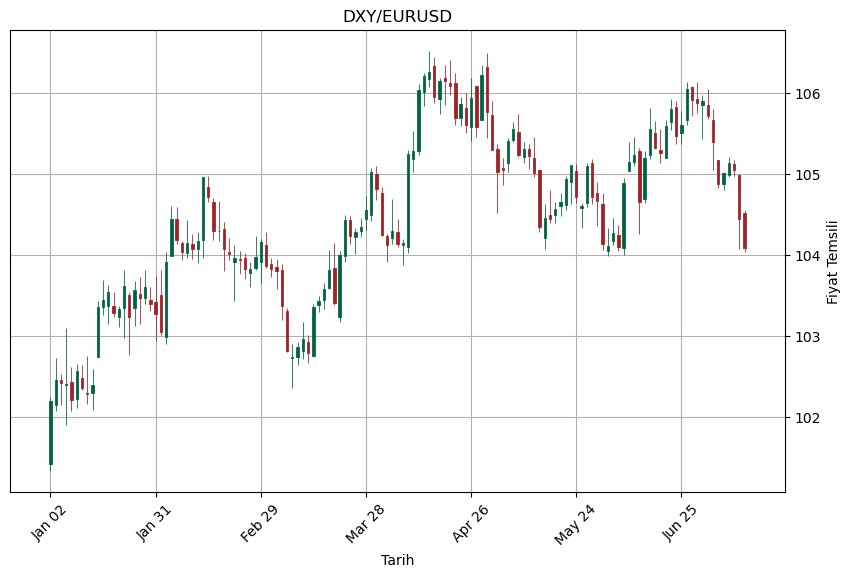

In [37]:
import mplfinance as mpf
import matplotlib.pyplot as plt

start_det = "2024-01-01"
end_det = "2024-07-15"
selected_det = det[(det.index >= start_det) & (det.index <= end_det)]
fig, ax = plt.subplots(figsize=(10, 6))
mpf.plot(selected_det, type='candle', ax=ax, style='charles')
plt.title("DXY/EURUSD")
plt.xlabel("Tarih")
plt.ylabel("Fiyat Temsili")
plt.grid(True)
plt.show()

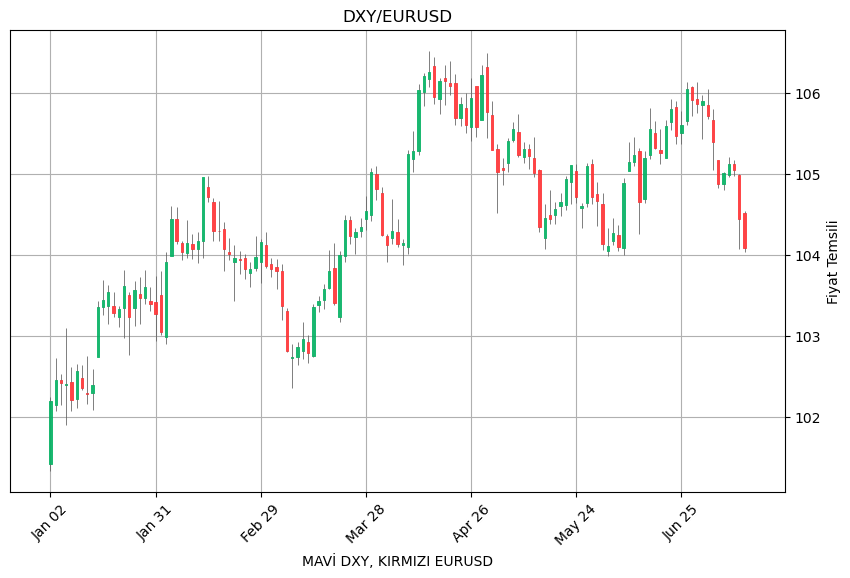

In [39]:
import mplfinance as mpf
import matplotlib.pyplot as plt
start_det = "2024-01-01"
end_det = "2024-07-15"

selected_det = det[(det.index >= start_det) & (det.index <= end_det)]
fig, ax = plt.subplots(figsize=(10, 6))

mpf.plot(selected_det, type='candle', ax=ax, style='yahoo')
plt.title("DXY/EURUSD")
plt.xlabel("MAVİ DXY, KIRMIZI EURUSD")
plt.ylabel("Fiyat Temsili")
plt.grid(True)



In [41]:
import pandas as pd
import yfinance as yf
veri = yf.download("THYAO.IS", start = "2022-02-27", end = "2024-02-27")
veri.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-20,279.75,284.00,278.75,281.25,281.25,38737028
2024-02-21,282.50,285.00,277.75,279.25,279.25,33090339
2024-02-22,281.00,287.25,280.75,285.00,285.00,45275866
2024-02-23,286.00,288.00,282.00,286.50,286.50,36388629
2024-02-26,288.00,290.50,284.75,285.50,285.50,46586805


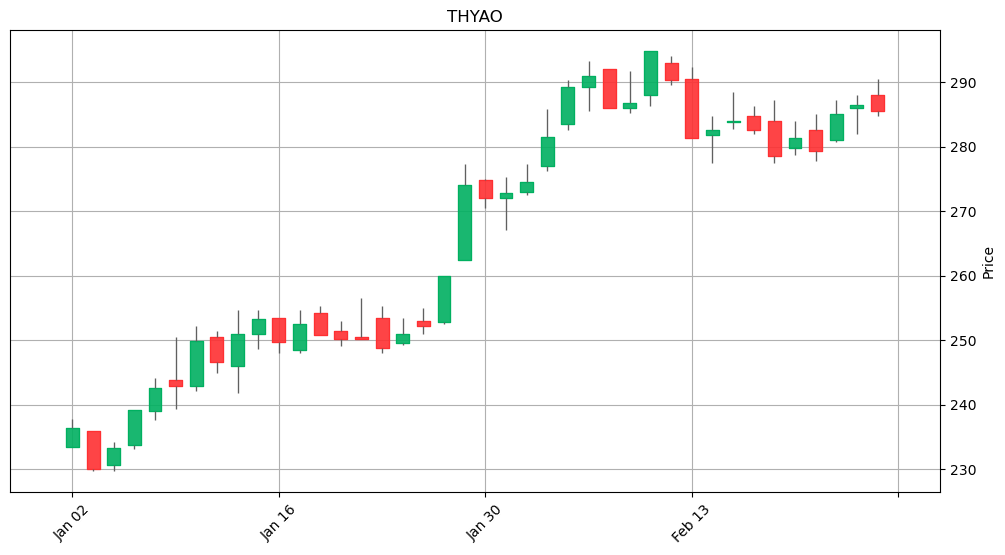

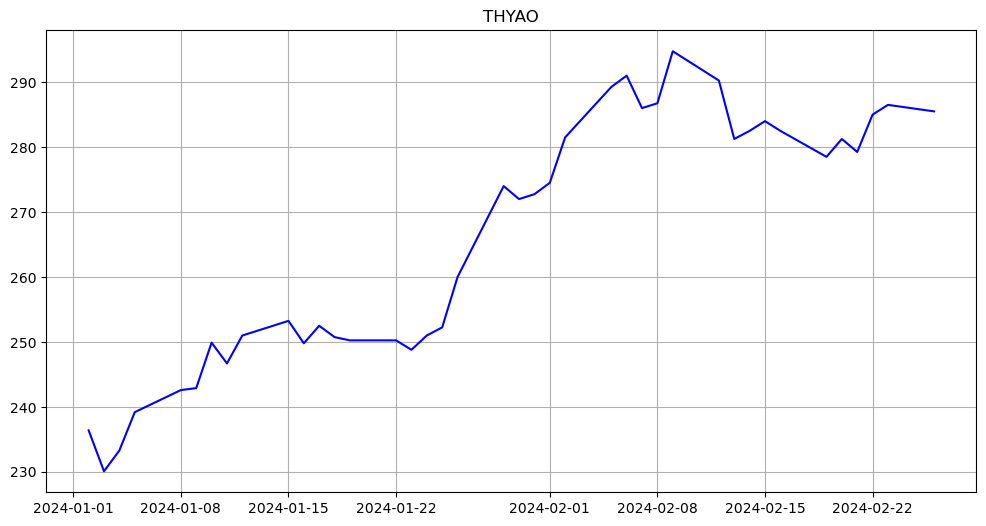

In [53]:
import mplfinance as mpf
import matplotlib.pyplot as plt
start = "2024-01-01"
end = "2024-07-15"
selected = veri[(veri.index >= start) & (veri.index <= end)]
fig,ax = plt.subplots(figsize = (12,6))
mpf.plot(selected, type = "candle", ax=ax, style = "yahoo")
plt.title("THYAO")
plt.grid(True)



start = "2024-01-01"
end = "2024-07-15"
selected = veri[(veri.index >= start) & (veri.index <= end)]
fig,ax = plt.subplots(figsize = (12,6))
plt.plot(selected.index, selected["Close"], color = "Blue")
plt.title("THYAO")
plt.grid(True)


